In [ ]:
import os
!git clone https://github.com/aldo-fsm/fake-news-detection.git
os.chdir('fake-news-detection')
# !pip install pipfile-requirements
# !pipfile2req > requirements.txt
# !pip install -r requirements.txt
!pip install ktrain
! mkdir models #&& mv ../SVM_rbf_20000feat_acc_0.909741 ./models/

In [8]:
!cp -r '../drive/MyDrive/TCC/Detecção de Fake News/Models/bert-ktrain-non-ranked/1_epoch_val_accuracy_0.9885/predictor' './models/'

In [9]:
%load_ext autoreload
%autoreload 2

In [ ]:
from IPython.display import display
import plotly_express as px
import plotly.io as pio
pio.renderers.default = 'colab'

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from preprocessing import stopwords, preprocess, putEndDot
from datasets import fake_br_corpus

In [15]:
dataset = fake_br_corpus.loadTest()
dataset['text'] = dataset.text.apply(putEndDot)

In [ ]:
import joblib
model = joblib.load('models/SVM_rbf_20000feat_acc_0.909741')

In [ ]:
from preprocessing.sentence_ranking_transformer import SentenceRankingTransformer
ranker = SentenceRankingTransformer(model, 'fake')

In [ ]:
dataset['rankedText'] = ranker.fit_transform(dataset.text)

In [12]:
import ktrain
from ktrain import text

In [16]:
ytrue = dataset.label.apply(lambda label: 'isFake' if label == 'fake' else 'isTrue').values
Xtest = dataset.text.values

In [17]:
path = 'models/predictor/'
predictor = ktrain.load_predictor(path)

In [ ]:
!pip install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [29]:
row = dataset.sample()
[text, label] = row[['text', 'label']].values[0]
label

'fake'

In [35]:
explanation = predictor.explain(text)

In [41]:
explanation

In [ ]:
from keras.utils.vis_utils import plot_model

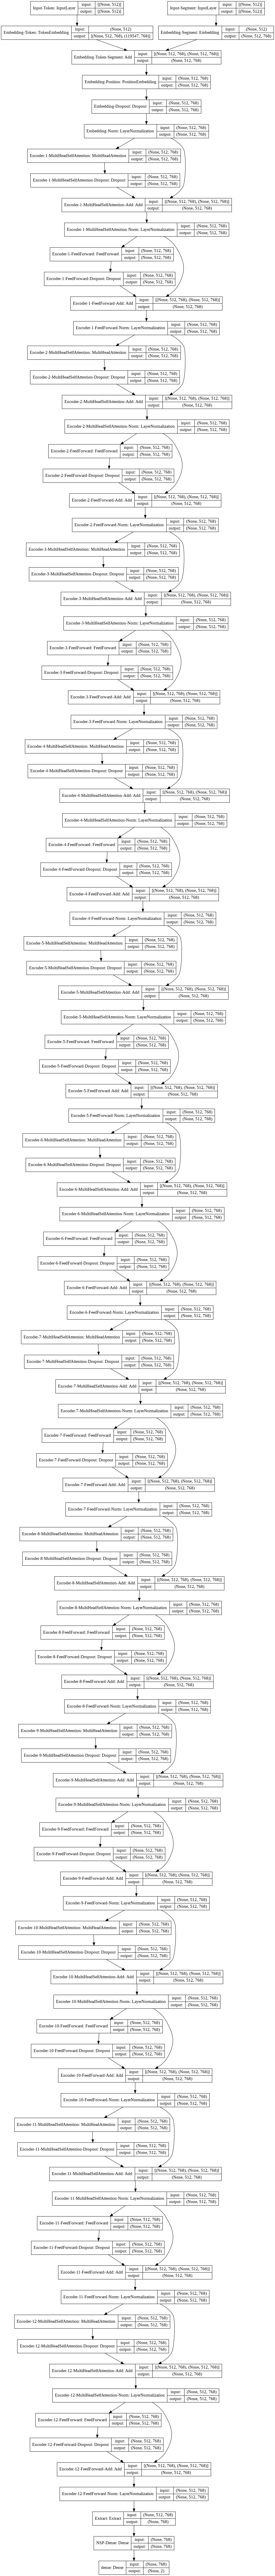

In [44]:
plot_model(predictor.model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)